##  PREDICTIVE MODELING
### MULTIPLE REGRESSION FOR PREDICTIVE MODELING
### Jaouad Safouani 

In [1]:
#importing libraries
import pandas as pd 
# display all columns in the dataframe.
pd.set_option('max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import statsmodels.api as sm

In [2]:
#print all visuals in one cell with no scroll bar

In [78]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [79]:
#reading data into a pandas data frame
df = pd.read_csv('churn_clean.csv')

In [80]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [81]:
#print information dataypes check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [82]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [83]:
# list of uncessary columns for multi regression
var_to_be_dropped_list = ['CaseOrder', 'Customer_id', 'Interaction', 'UID','TimeZone','Job','PaymentMethod','County'
                          ,'State','City','Zip', 'Lat','Lng','Population', 'Area']
var_to_be_dropped_list

['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'TimeZone',
 'Job',
 'PaymentMethod',
 'County',
 'State',
 'City',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area']

In [84]:
df.drop(columns = var_to_be_dropped_list , inplace = True)

In [85]:
df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [86]:
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [87]:
df.shape

(10000, 35)

## Detecting and Removing Outliers

In [88]:
# define a function to identify plot variables in boxplot
def plot_boxplot(df, col):
    sns.boxplot(x= col,
               data = df,
               showmeans=True)
    plt.title(col + ' Distribution' )
    plt.show()

#### Ploting numerical variables to identify variables with outliers.

In [89]:
# create a dictionary with columns and their datatype. 
dict_col_type = dict()
for col in list(df.columns):
    dict_col_type[col] = df[col].dtypes

In [90]:
dict_col_type

{'Children': dtype('int64'),
 'Age': dtype('int64'),
 'Income': dtype('float64'),
 'Marital': dtype('O'),
 'Gender': dtype('O'),
 'Churn': dtype('O'),
 'Outage_sec_perweek': dtype('float64'),
 'Email': dtype('int64'),
 'Contacts': dtype('int64'),
 'Yearly_equip_failure': dtype('int64'),
 'Techie': dtype('O'),
 'Contract': dtype('O'),
 'Port_modem': dtype('O'),
 'Tablet': dtype('O'),
 'InternetService': dtype('O'),
 'Phone': dtype('O'),
 'Multiple': dtype('O'),
 'OnlineSecurity': dtype('O'),
 'OnlineBackup': dtype('O'),
 'DeviceProtection': dtype('O'),
 'TechSupport': dtype('O'),
 'StreamingTV': dtype('O'),
 'StreamingMovies': dtype('O'),
 'PaperlessBilling': dtype('O'),
 'Tenure': dtype('float64'),
 'MonthlyCharge': dtype('float64'),
 'Bandwidth_GB_Year': dtype('float64'),
 'Item1': dtype('int64'),
 'Item2': dtype('int64'),
 'Item3': dtype('int64'),
 'Item4': dtype('int64'),
 'Item5': dtype('int64'),
 'Item6': dtype('int64'),
 'Item7': dtype('int64'),
 'Item8': dtype('int64')}

In [91]:
df_numeric_variable= dict()
for i, v in dict_col_type.items():
    if (dict_col_type[i]=='int64' or dict_col_type[i]=='float64'):
        df_numeric_variable[i]= v

In [92]:
df_numeric_variable

{'Children': dtype('int64'),
 'Age': dtype('int64'),
 'Income': dtype('float64'),
 'Outage_sec_perweek': dtype('float64'),
 'Email': dtype('int64'),
 'Contacts': dtype('int64'),
 'Yearly_equip_failure': dtype('int64'),
 'Tenure': dtype('float64'),
 'MonthlyCharge': dtype('float64'),
 'Bandwidth_GB_Year': dtype('float64'),
 'Item1': dtype('int64'),
 'Item2': dtype('int64'),
 'Item3': dtype('int64'),
 'Item4': dtype('int64'),
 'Item5': dtype('int64'),
 'Item6': dtype('int64'),
 'Item7': dtype('int64'),
 'Item8': dtype('int64')}

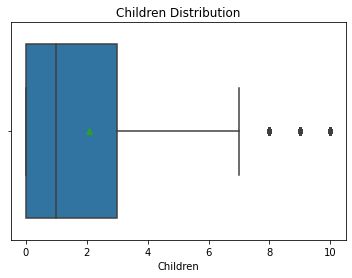

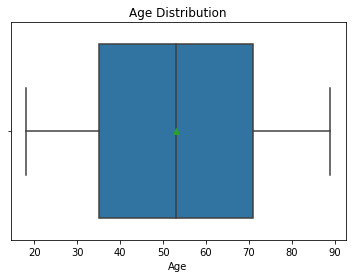

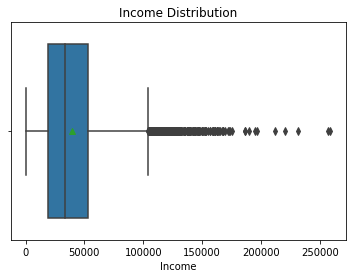

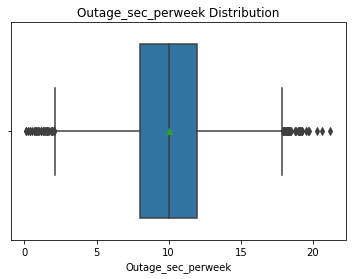

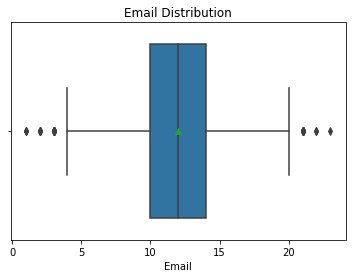

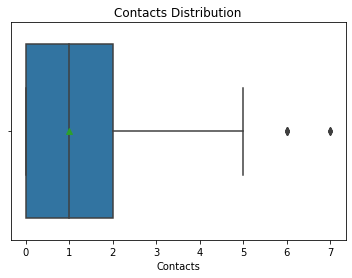

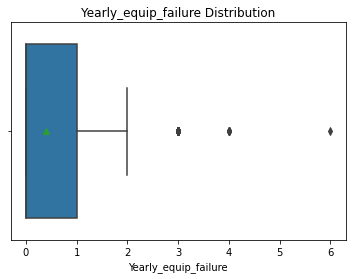

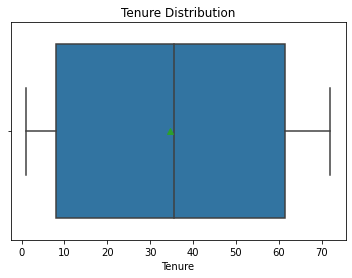

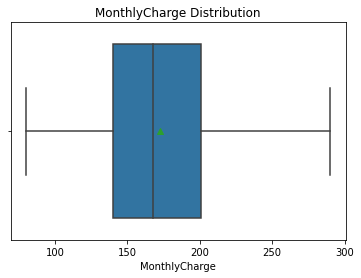

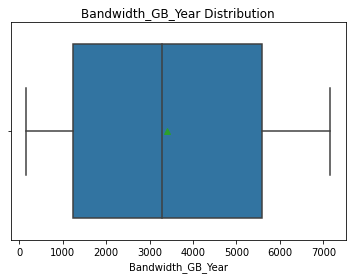

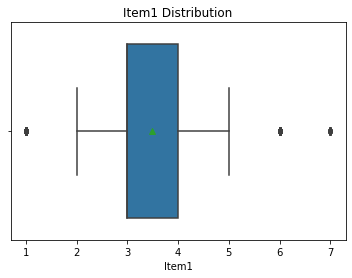

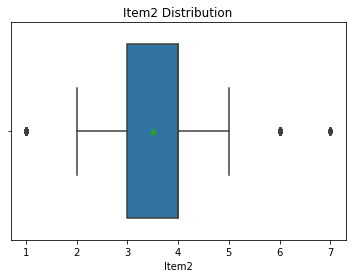

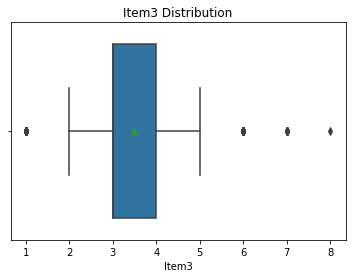

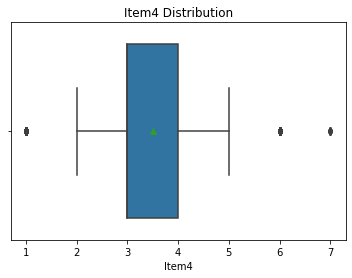

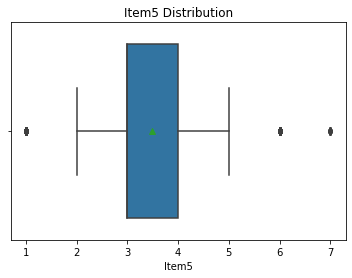

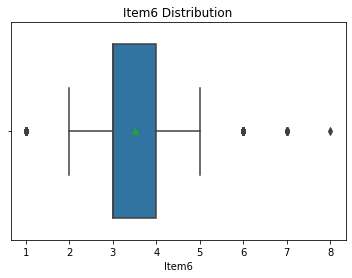

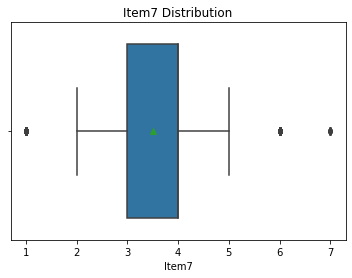

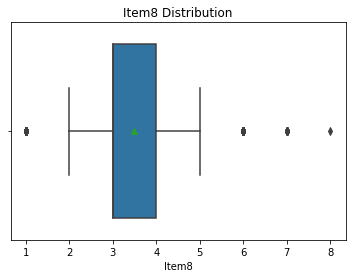

In [93]:
for col in df_numeric_variable.keys():
    plot_boxplot(df, col)

## Univariate Analysis to verify if Outliers were removed

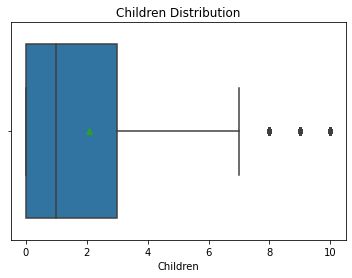

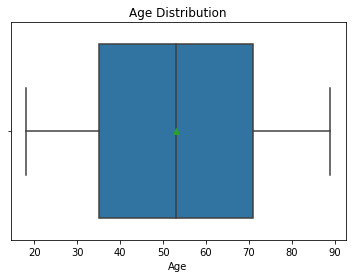

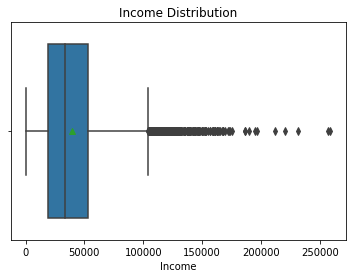

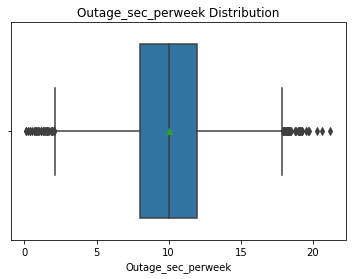

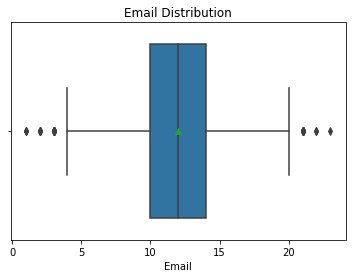

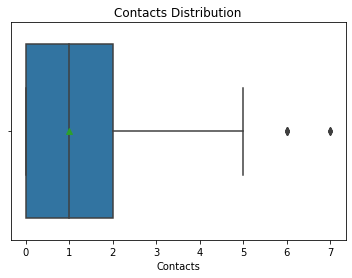

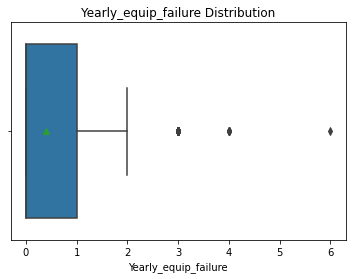

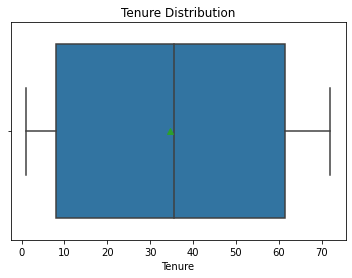

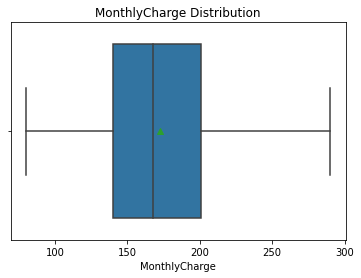

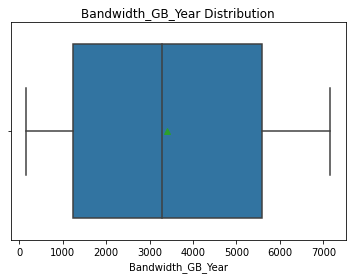

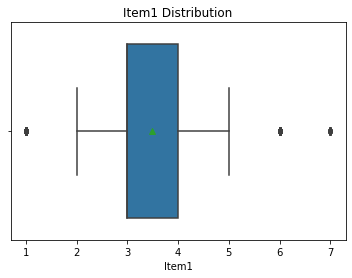

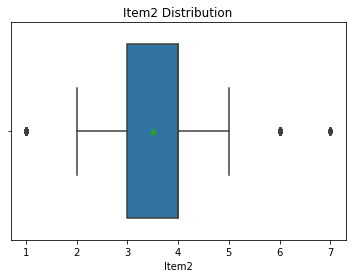

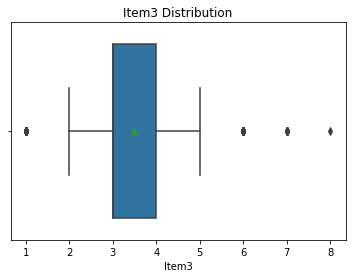

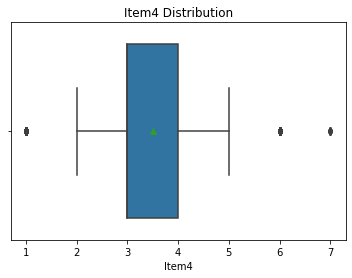

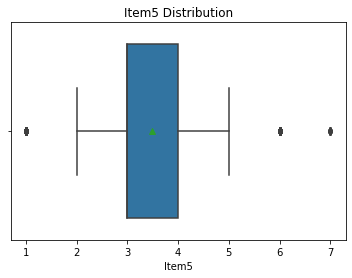

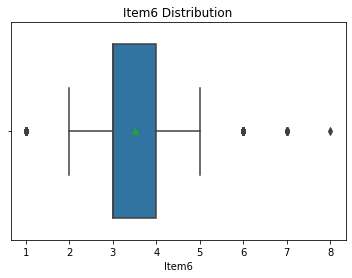

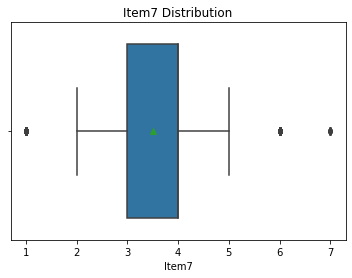

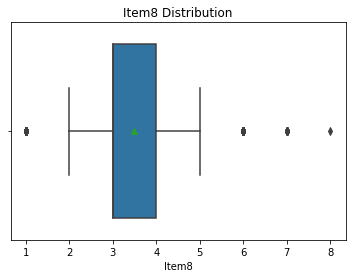

In [94]:
for col in df_numeric_variable.keys():
    plot_boxplot(df, col)

In [95]:
# Get the columns with string values
list_object_col  =[]
list_numeric_col =[]
for col , _type in dict_col_type.items():
    if 'object' in str(_type):
        list_object_col.append(col)
    else:
        list_numeric_col.append(col)

In [96]:
len(list_numeric_col) + len(list_object_col)

35

In [97]:
len(list_object_col)

17

## Re-expression

In [98]:
#Assign unique values for each object variable and store data in a dictionary
dict_col_withdistinct_values=dict()
for col in list_object_col:
    dict_col_withdistinct_values[col]= df[col].unique()

In [99]:
# for key,values in dict_col_withdistinct_values.items():
#     print(key," : ", values)

In [100]:
# identify columns with Yes/ NO 
# We will use ordinal Encoding for variables with Yes No 
# and One hot Encoding for the other categorical non ordinal columns.
List_var_Yes_No=[]
List_var_Other=[]
for key,values in dict_col_withdistinct_values.items():
    if 'No' in values and 'Yes' in values:
        List_var_Yes_No.append(key)
    else:
        List_var_Other.append(key)
        


In [101]:
df.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

### Oridinal Encoding

In [102]:
List_var_Yes_No

['Churn',
 'Techie',
 'Port_modem',
 'Tablet',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [103]:
# Defining the map function to replace Yes and No with 1 and 0
# Ordinal Encoding
def Yes_No_dict_map(x):
    ''' Ordinal Encoding '''
    return x.map({'Yes':1, 'No':0})


In [104]:
# Replace the Yes and No with 1 and 0 in binary variables.
# Applying Ordinal encoding to Re express Yes No to 1 and 0 respectevely.
df[List_var_Yes_No]=df[List_var_Yes_No].apply(Yes_No_dict_map)

In [105]:
df[List_var_Yes_No].head()

,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,1,0,1,1,1,1,0,0,0,1,1,1
2,0,1,1,0,1,1,0,0,0,0,0,1,1
3,0,1,0,0,1,0,1,0,0,0,1,0,1
4,1,0,1,0,0,0,0,0,0,1,1,0,0


### One-Hot Encoding


In [106]:
dict_var_less5 = dict()
for key,values in dict_col_withdistinct_values.items():
    if key in List_var_Other:
        dict_var_less5[key] = values

In [107]:
for c in list(dict_var_less5.keys()):
    print(c)

Marital
Gender
Contract
InternetService


In [108]:
df['Gender'].unique()

array(['Male', 'Female', 'Nonbinary'], dtype=object)

In [109]:
# Using One hot encoding to prepare the data multi leaner regresssion model.
# Notice we are dropping the first column in the dummy data frame to avoid the dummy-variable trap, 
# resulting from the One hot encoding.

for col in dict_var_less5.keys():
    df_ = pd.get_dummies(df[col], drop_first = True).astype('int64')
    df = pd.concat([df, df_], axis = 1)
    df.drop(columns = col, inplace = True)
    


In [110]:
#dropped None as it is an outliers.
df.drop(columns=['None'], inplace =True)

## Univariate analysis to determine the distribution of the variables

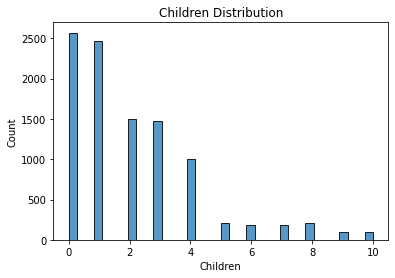

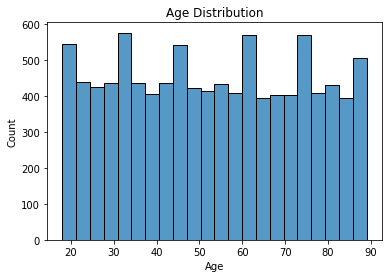

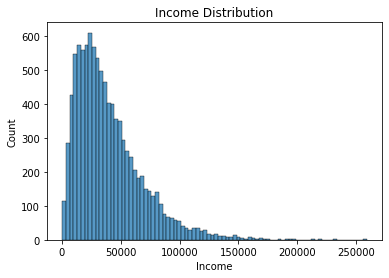

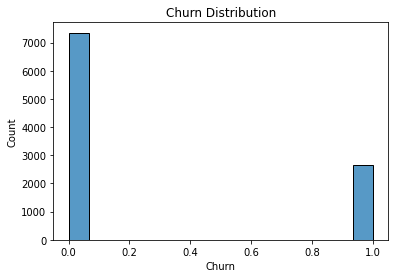

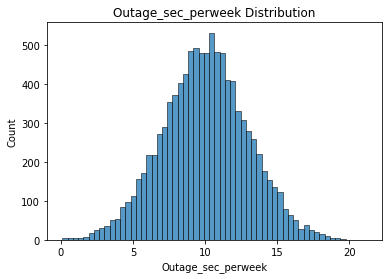

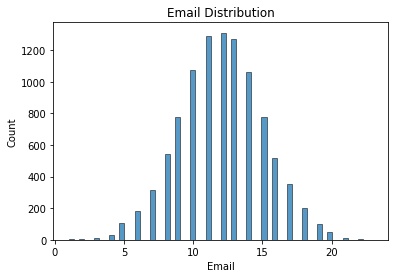

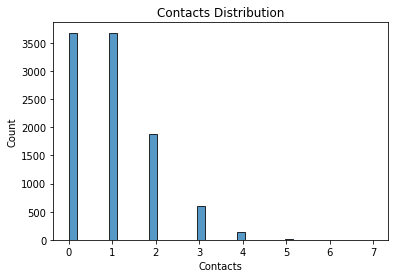

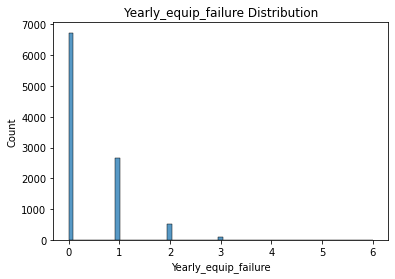

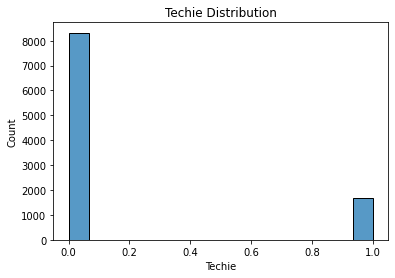

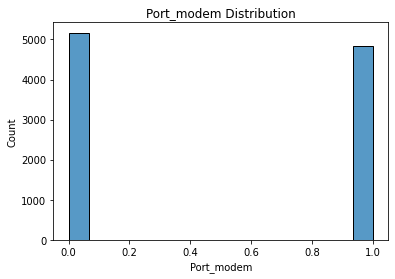

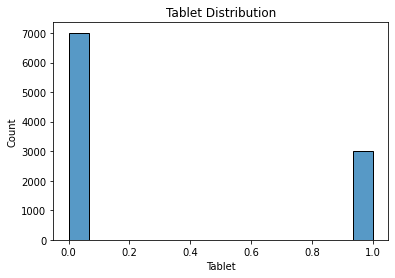

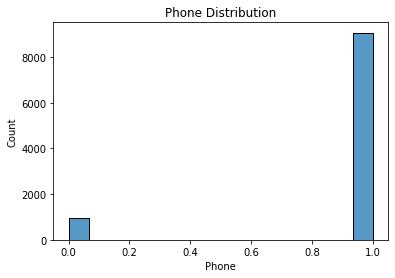

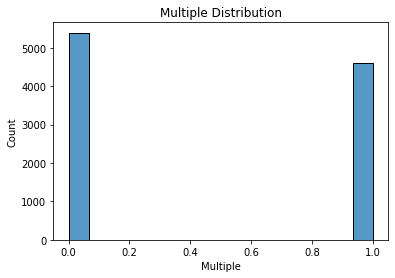

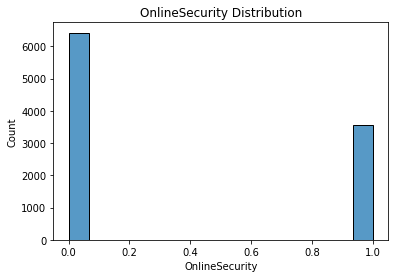

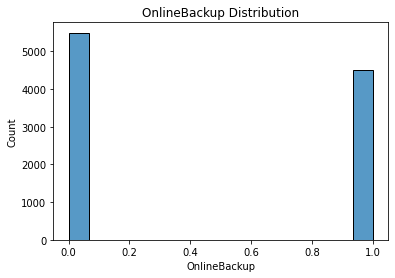

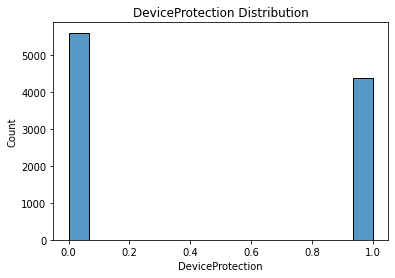

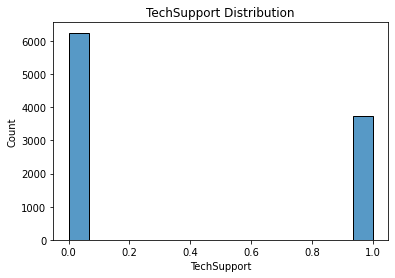

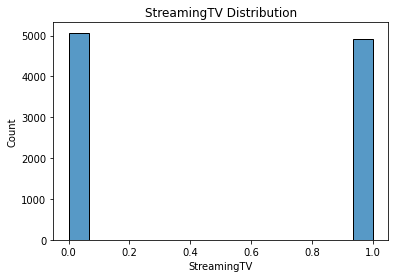

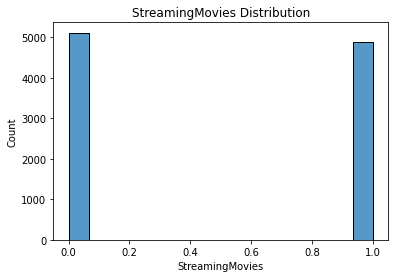

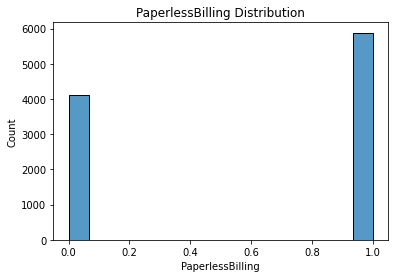

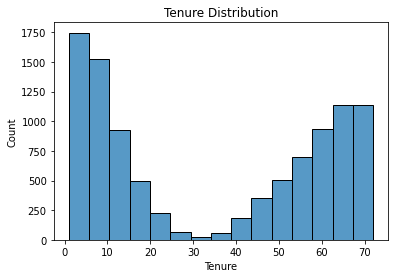

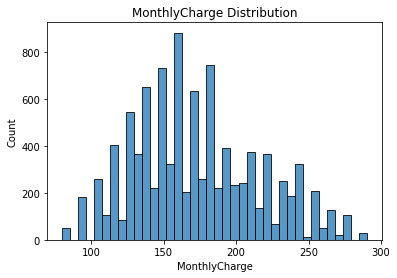

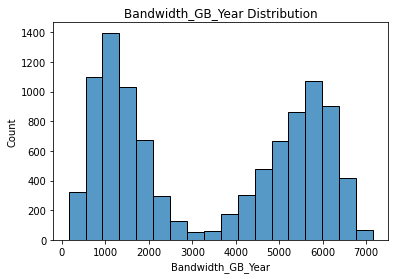

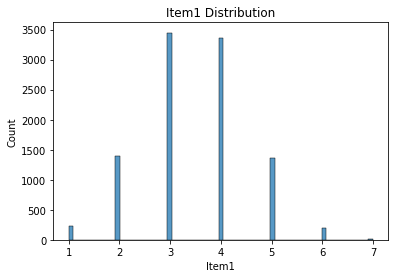

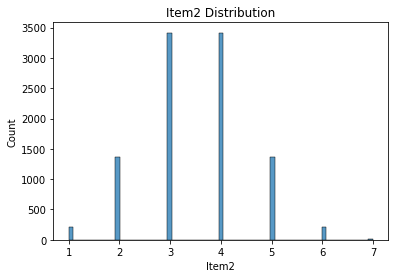

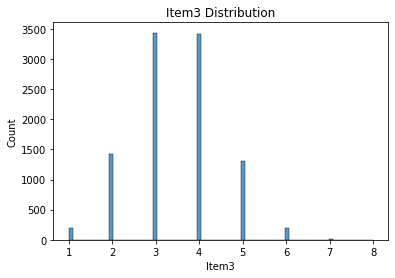

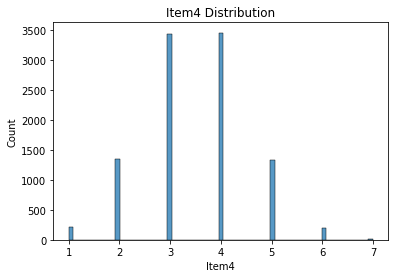

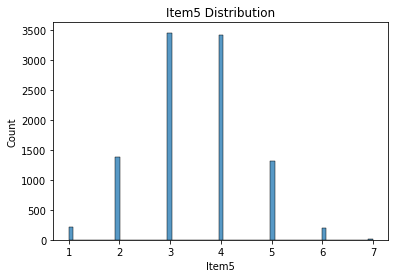

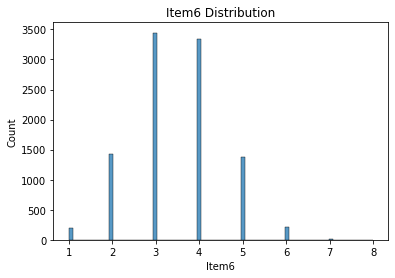

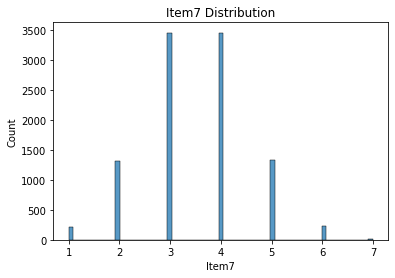

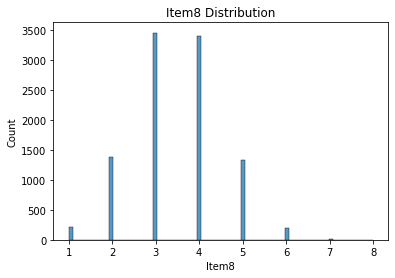

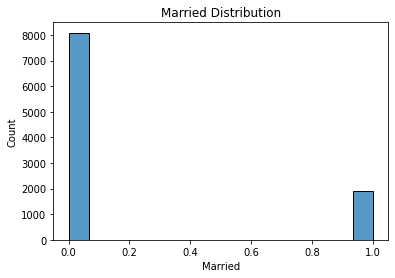

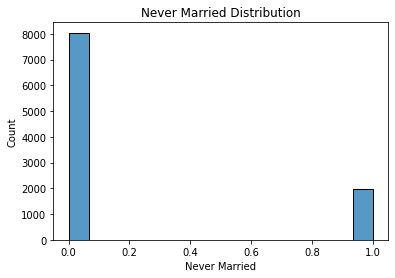

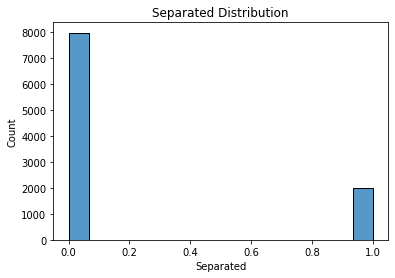

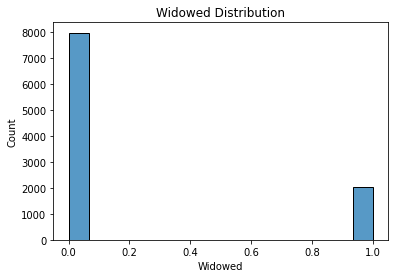

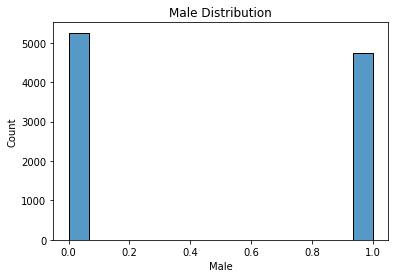

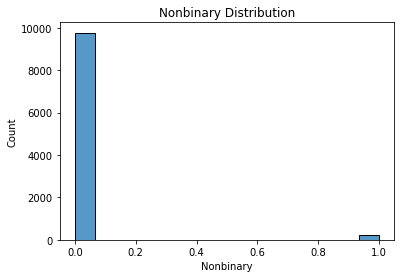

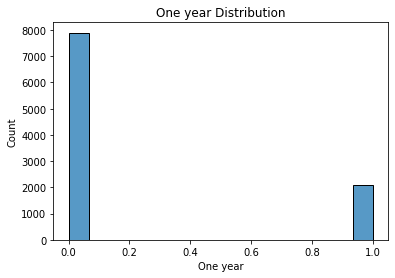

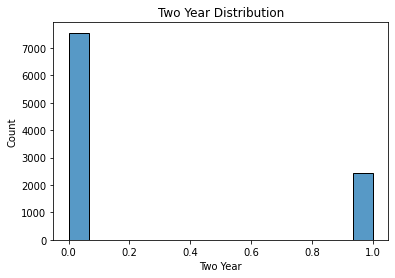

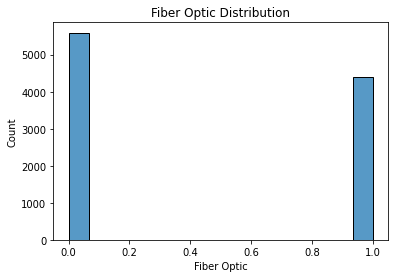

In [111]:
for col in df.columns:
    sns.histplot(df[col])
    plt.title(col + ' Distribution')
    plt.show()

In [112]:
df.shape

(10000, 40)

## Bivariate Analysis to see if there is a correlation between Independent variables and Bandwidth_GB_Year.

In [113]:
independent_variables = sorted([col for col in df.columns if col != 'Bandwidth_GB_Year'])
independent_variables

['Age',
 'Children',
 'Churn',
 'Contacts',
 'DeviceProtection',
 'Email',
 'Fiber Optic',
 'Income',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8',
 'Male',
 'Married',
 'MonthlyCharge',
 'Multiple',
 'Never Married',
 'Nonbinary',
 'One year',
 'OnlineBackup',
 'OnlineSecurity',
 'Outage_sec_perweek',
 'PaperlessBilling',
 'Phone',
 'Port_modem',
 'Separated',
 'StreamingMovies',
 'StreamingTV',
 'Tablet',
 'TechSupport',
 'Techie',
 'Tenure',
 'Two Year',
 'Widowed',
 'Yearly_equip_failure']

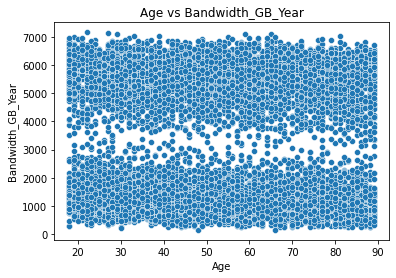

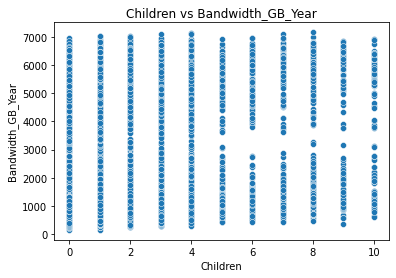

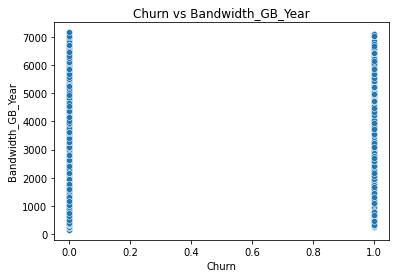

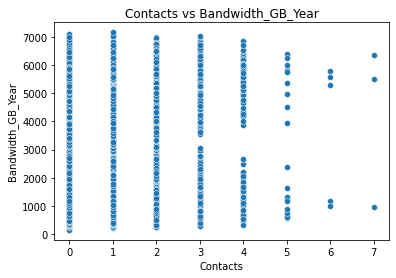

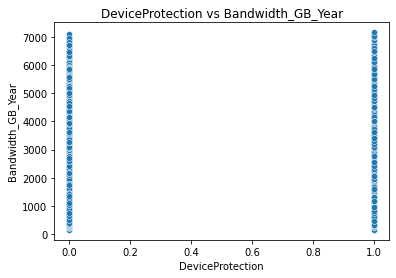

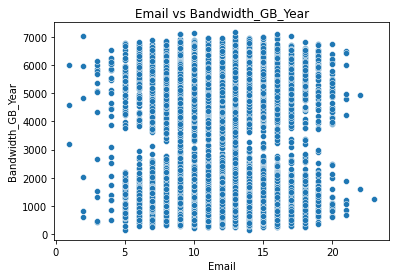

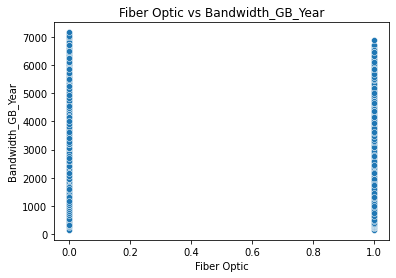

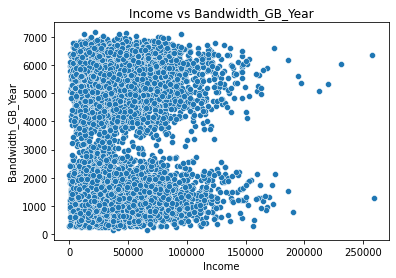

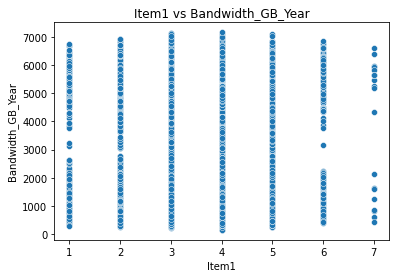

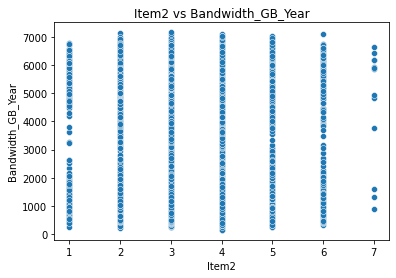

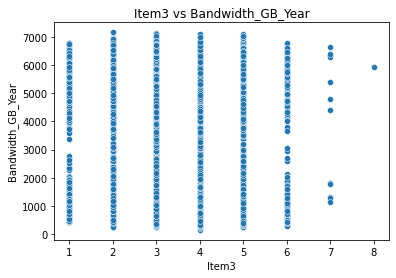

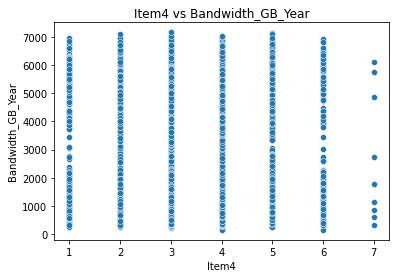

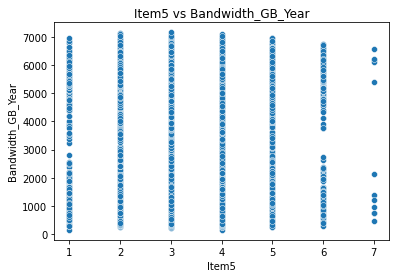

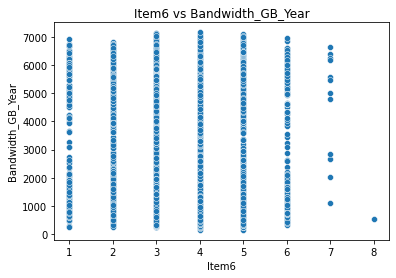

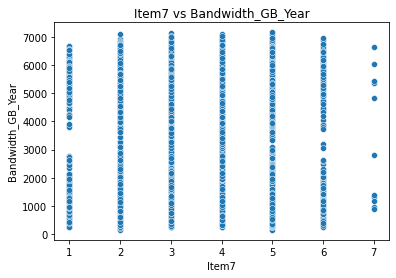

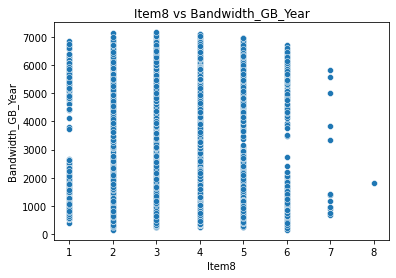

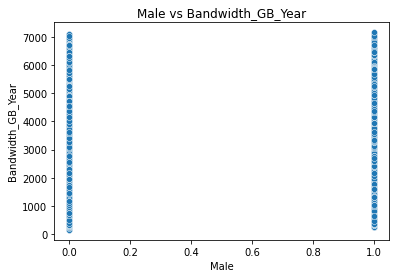

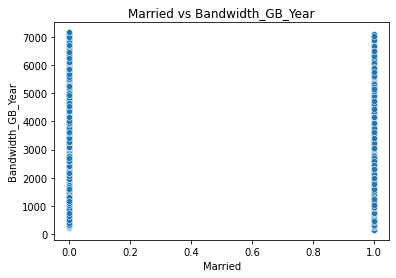

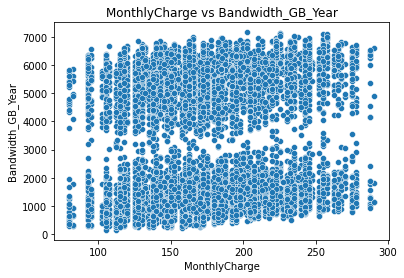

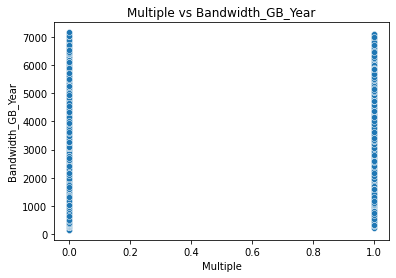

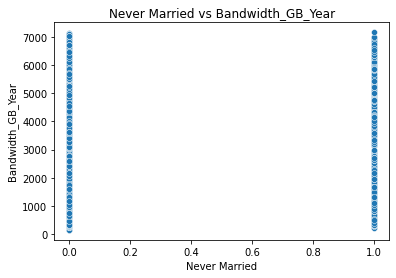

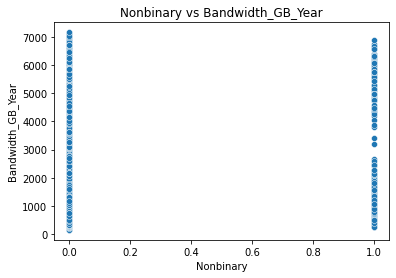

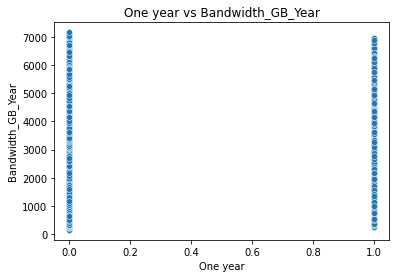

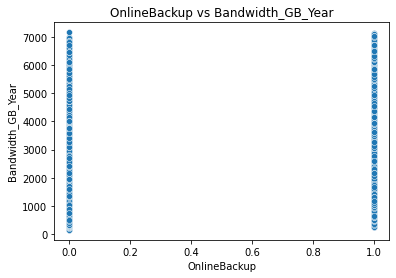

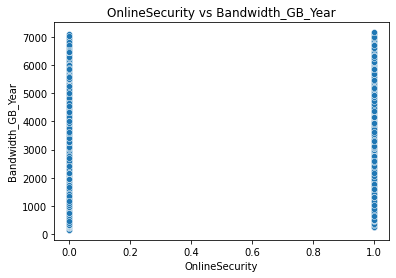

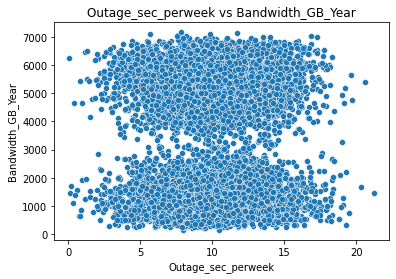

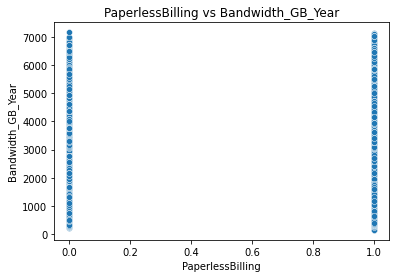

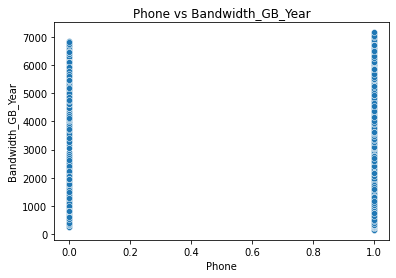

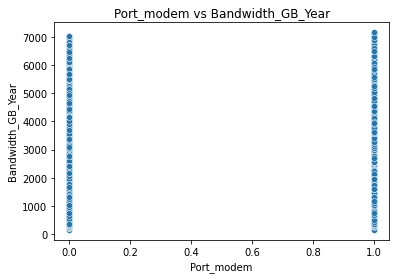

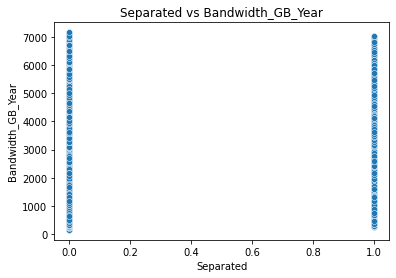

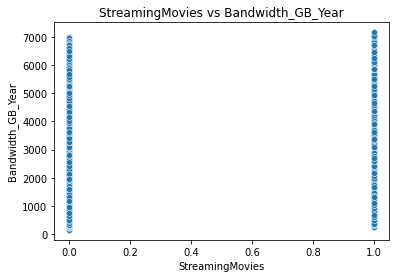

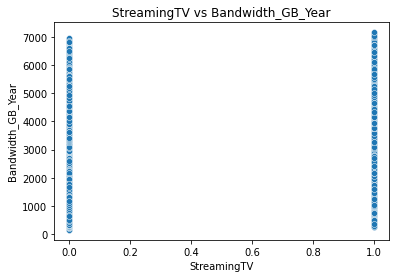

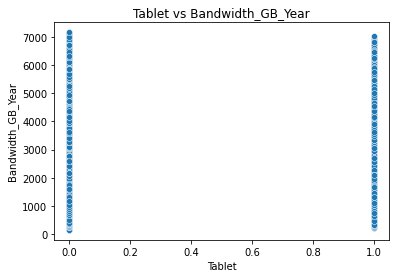

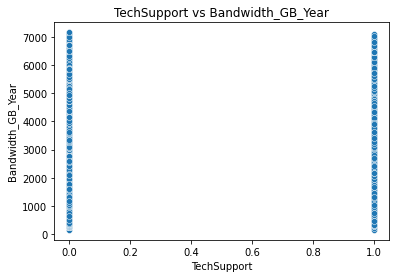

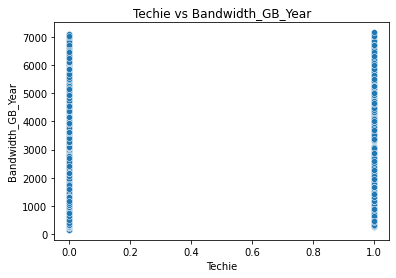

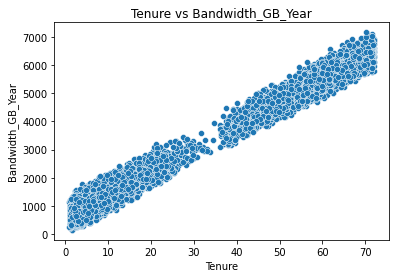

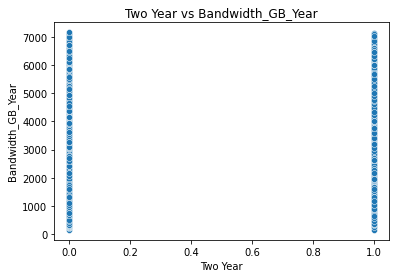

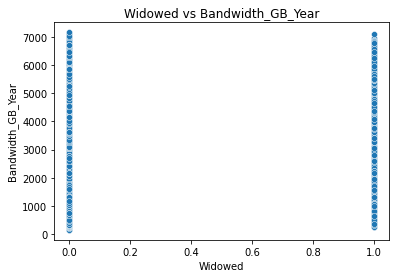

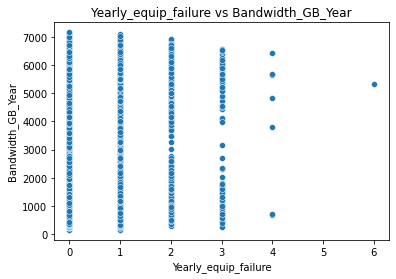

In [114]:
for col in independent_variables:
    sns.scatterplot(data=df, x=col, y="Bandwidth_GB_Year")
    plt.title( col + ' vs Bandwidth_GB_Year')
    plt.show()
    

In [115]:
# Creating a list of ordered columns 
Order_variables = sorted(independent_variables)

In [116]:
#appending Tenure the dependent variable to be last in the dataset 
Order_variables.append('Bandwidth_GB_Year') 

In [117]:
# sort the columns in the the df dataset.
df = df[Order_variables]

In [118]:
df.shape

(10000, 40)

In [119]:
df.describe()

,Age,Children,Churn,Contacts,DeviceProtection,Email,Fiber Optic,Income,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Male,Married,MonthlyCharge,Multiple,Never Married,Nonbinary,One year,OnlineBackup,OnlineSecurity,Outage_sec_perweek,PaperlessBilling,Phone,Port_modem,Separated,StreamingMovies,StreamingTV,Tablet,TechSupport,Techie,Tenure,Two Year,Widowed,Yearly_equip_failure,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,2.0877,0.265000,0.994200,0.438600,12.016000,0.440800,39806.926771,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,0.474400,0.191100,172.624816,0.460800,0.195600,0.023100,0.210200,0.450600,0.357600,10.001848,0.588200,0.906700,0.483400,0.201400,0.489000,0.492900,0.299100,0.375000,0.167900,34.526188,0.244200,0.202700,0.398000,3392.341550
std,20.698882,2.1472,0.441355,0.988466,0.496241,3.025898,0.496508,28199.916702,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,0.499369,0.393187,42.943094,0.498486,0.396682,0.150229,0.407471,0.497579,0.479317,2.976019,0.492184,0.290867,0.499749,0.401066,0.499904,0.499975,0.457887,0.484147,0.373796,26.443063,0.429633,0.402031,0.635953,2185.294852
min,18.000000,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,348.670000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,79.978860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000259,0.000000,0.000000,0.000000,155.506715
25%,35.000000,0.0000,0.000000,0.000000,0.000000,10.000000,0.000000,19224.717500,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,139.979239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.018214,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.917694,0.000000,0.000000,0.000000,1236.470827
50%,53.000000,1.0000,0.000000,1.000000,0.000000,12.000000,0.000000,33170.605000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,167.484700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.018560,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.430507,0.000000,0.000000,0.000000,3279.536903
75%,71.000000,3.0000,1.000000,2.000000,1.000000,14.000000,1.000000,53246.170000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,0.000000,200.734725,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.969485,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,61.479795,0.000000,0.000000,1.000000,5586.141370
max,89.000000,10.0000,1.000000,7.000000,1.000000,23.000000,1.000000,258900.700000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,1.000000,1.000000,290.160419,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.207230,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.999280,1.000000,1.000000,6.000000,7158.981530


In [120]:
# verify that the columns are ordere alphabetically in the dataset.
df.head()

,Age,Children,Churn,Contacts,DeviceProtection,Email,Fiber Optic,Income,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Male,Married,MonthlyCharge,Multiple,Never Married,Nonbinary,One year,OnlineBackup,OnlineSecurity,Outage_sec_perweek,PaperlessBilling,Phone,Port_modem,Separated,StreamingMovies,StreamingTV,Tablet,TechSupport,Techie,Tenure,Two Year,Widowed,Yearly_equip_failure,Bandwidth_GB_Year
0,68,0,0,0,0,10,1,28561.99,5,5,5,3,4,4,3,4,1,0,172.455519,0,0,0,1,1,1,7.978323,1,1,1,0,1,0,1,0,0,6.795513,0,1,1,904.536110
1,27,1,1,0,0,12,1,21704.77,3,4,3,3,4,3,4,4,0,1,242.632554,1,0,0,0,0,1,11.699080,1,1,0,0,1,1,1,0,1,1.156681,0,0,1,800.982766
2,50,4,0,0,0,9,0,9609.57,4,4,2,4,4,3,3,3,0,0,159.947583,1,0,0,0,0,0,10.752800,1,1,1,0,1,0,0,0,1,15.754144,1,1,1,2054.706961
3,48,1,0,2,0,15,0,18925.23,4,4,4,2,5,4,3,3,1,1,119.956840,0,0,0,0,0,1,14.913540,1,1,0,0,0,1,0,0,1,17.087227,1,0,0,2164.579412
4,83,0,1,2,0,16,1,40074.19,4,4,4,3,4,4,4,5,1,0,149.948316,0,0,0,0,0,0,8.147417,0,0,1,1,0,1,0,1,0,1.670972,0,0,1,271.493436


In [121]:
#export the prepared dataset to csv
df.to_csv("prepared_churn_clean.csv")

## D1: INITIAL MODEL

### 1.  Construct an initial multiple regression model from all predictors that were identified in Part C2.

Signifance Level Alpha = 0.05

We will take an approach of starting with variables and then we will remove and add variables per statistical findings

In [122]:
independent_variables.append('constant')
print(independent_variables)

['Age', 'Children', 'Churn', 'Contacts', 'DeviceProtection', 'Email', 'Fiber Optic', 'Income', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Male', 'Married', 'MonthlyCharge', 'Multiple', 'Never Married', 'Nonbinary', 'One year', 'OnlineBackup', 'OnlineSecurity', 'Outage_sec_perweek', 'PaperlessBilling', 'Phone', 'Port_modem', 'Separated', 'StreamingMovies', 'StreamingTV', 'Tablet', 'TechSupport', 'Techie', 'Tenure', 'Two Year', 'Widowed', 'Yearly_equip_failure', 'constant']


#### Initial model with all predictors

In [123]:
# sm.add_constant(df)
df['constant']=1
# sm.add_constant(df)
lm_gb_initial = sm.OLS(df['Bandwidth_GB_Year'], df[independent_variables]).fit()

print(lm_gb_initial.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.317e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:24:59   Log-Likelihood:                -62139.
No. Observations:               10000   AIC:                         1.244e+05
Df Residuals:                    9960   BIC:                         1.246e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age                     -3.3319 

we notice that both R Squared and Adj. R squared are at 0.999 which indicates that the model is overfitting.

In [124]:
#Generating the MLR Equation
MLR_equation = []
for var, coef in lm_gb_initial.params.items():
    if var != 'constant':
        MLR_equation.append( '( ' + str(round(coef, 3)) + ' * ' + var  + ' )' )
    else:
        MLR_equation.append(str(round(coef, 3)))
' + '.join(MLR_equation)

'( -3.332 * Age ) + ( 30.397 * Children ) + ( 12.731 * Churn ) + ( 2.032 * Contacts ) + ( -32.771 * DeviceProtection ) + ( 0.026 * Email ) + ( -485.163 * Fiber Optic ) + ( 0.0 * Income ) + ( 0.002 * Item1 ) + ( 0.41 * Item2 ) + ( -2.361 * Item3 ) + ( -0.472 * Item4 ) + ( 0.959 * Item5 ) + ( 1.41 * Item6 ) + ( 0.113 * Item7 ) + ( 2.761 * Item8 ) + ( 67.703 * Male ) + ( -1.834 * Married ) + ( 9.267 * MonthlyCharge ) + ( -226.817 * Multiple ) + ( 0.566 * Never Married ) + ( -17.504 * Nonbinary ) + ( 0.006 * One year ) + ( -115.339 * OnlineBackup ) + ( 54.0 * OnlineSecurity ) + ( -0.374 * Outage_sec_perweek ) + ( -2.794 * PaperlessBilling ) + ( 0.919 * Phone ) + ( 0.654 * Port_modem ) + ( -3.626 * Separated ) + ( -277.548 * StreamingMovies ) + ( -165.773 * StreamingTV ) + ( 0.569 * Tablet ) + ( -110.022 * TechSupport ) + ( -1.886 * Techie ) + ( 82.099 * Tenure ) + ( 3.816 * Two Year ) + ( -6.368 * Widowed ) + ( 1.68 * Yearly_equip_failure ) + -347.241'

In [125]:
lm_gb_pvalues = dict(lm_gb_initial.pvalues)

#### Let's investigate variables that are not statistically signifance using an alpha of 0.05 (95% confidence) and remove them and rerun the model

In [126]:
#### Let's investigate variables that are not statistically signifance using an alpha of 0.05 (95% confidence) and remove them and rerun the model

df_corr =dict()
for col in independent_variables:
    df_corr[col]= df[col].corr(df['Bandwidth_GB_Year'])
df_corr

{'Age': -0.014723647757344895,
 'Children': 0.025584816496506645,
 'Churn': -0.44166869015311017,
 'Contacts': 0.003298723811955731,
 'DeviceProtection': -0.007856174037157408,
 'Email': -0.014579148042462617,
 'Fiber Optic': -0.061955615870142526,
 'Income': 0.00367354962848468,
 'Item1': -0.007314106591613036,
 'Item2': 0.003062487626766105,
 'Item3': 0.0009781488143391125,
 'Item4': -0.007788787536908306,
 'Item5': 0.025111564063635673,
 'Item6': -0.010351846859753868,
 'Item7': -0.0010772478381359273,
 'Item8': -0.015018141204966251,
 'Male': 0.006723679099506461,
 'Married': 0.00514556026295998,
 'MonthlyCharge': 0.06040643083798312,
 'Multiple': 0.006822691841341392,
 'Never Married': 0.0019410990511547154,
 'Nonbinary': -0.013833568018954145,
 'One year': -0.003968931043854801,
 'OnlineBackup': 0.041739760832235545,
 'OnlineSecurity': 0.02100593557956632,
 'Outage_sec_perweek': 0.004175661380399892,
 'PaperlessBilling': -0.0024703861516958,
 'Phone': 0.001331502709054573,
 'Port

In [127]:
non_significant_var=[]
for var, pvalue in lm_gb_pvalues.items():
    if pvalue > 0.05:
        non_significant_var.append(var)
        print (var, 'Pvalue:', str(round(pvalue,3)), ' Corr:', str(round(df_corr[var],3)))

Contacts Pvalue: 0.098  Corr: 0.003
Email Pvalue: 0.949  Corr: -0.015
Income Pvalue: 0.77  Corr: 0.004
Item1 Pvalue: 0.999  Corr: -0.007
Item2 Pvalue: 0.802  Corr: 0.003
Item3 Pvalue: 0.114  Corr: 0.001
Item4 Pvalue: 0.724  Corr: -0.008
Item5 Pvalue: 0.489  Corr: 0.025
Item6 Pvalue: 0.323  Corr: -0.01
Item7 Pvalue: 0.934  Corr: -0.001
Married Pvalue: 0.633  Corr: 0.005
Never Married Pvalue: 0.882  Corr: 0.002
One year Pvalue: 0.999  Corr: -0.004
Outage_sec_perweek Pvalue: 0.359  Corr: 0.004
PaperlessBilling Pvalue: 0.258  Corr: -0.002
Phone Pvalue: 0.826  Corr: 0.001
Port_modem Pvalue: 0.788  Corr: 0.009
Separated Pvalue: 0.338  Corr: 0.002
Tablet Pvalue: 0.83  Corr: 0.002
Techie Pvalue: 0.563  Corr: -0.009
Two Year Pvalue: 0.218  Corr: 0.021
Widowed Pvalue: 0.093  Corr: -0.002
Yearly_equip_failure Pvalue: 0.379  Corr: 0.012


In [128]:
print(non_significant_var)

['Contacts', 'Email', 'Income', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Married', 'Never Married', 'One year', 'Outage_sec_perweek', 'PaperlessBilling', 'Phone', 'Port_modem', 'Separated', 'Tablet', 'Techie', 'Two Year', 'Widowed', 'Yearly_equip_failure']


These items are not significantly correlated with the dependent variable Bandwidth_GB_Year.
Let's drop them from the model

In [129]:
second_Independent_var_list =[]
for var in independent_variables:
    if var not in non_significant_var:
        second_Independent_var_list.append(var)

In [130]:
print(second_Independent_var_list)

['Age', 'Children', 'Churn', 'DeviceProtection', 'Fiber Optic', 'Item8', 'Male', 'MonthlyCharge', 'Multiple', 'Nonbinary', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'Tenure', 'constant']


In [131]:
##### Second Attempt at buillding Model

In [132]:
# sm.add_constant(df)
lm_gb_second = sm.OLS(df['Bandwidth_GB_Year'], df[second_Independent_var_list]).fit()

print(lm_gb_second.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.029e+05
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:25:00   Log-Likelihood:                -62147.
No. Observations:               10000   AIC:                         1.243e+05
Df Residuals:                    9983   BIC:                         1.245e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -3.3272      0.059  

### Third attempt removing features with VIF > 5

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

df_new_model = df[second_Independent_var_list]
vif = pd.DataFrame()
vif['Features'] = second_Independent_var_list
vif['VIF'] = [variance_inflation_factor(df_new_model.values, i) for i in range(df_new_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
# vif

third_attemp_indep_var = list(vif[vif['VIF'] <= 5]['Features'])

print(sorted(third_attemp_indep_var), len(third_attemp_indep_var))

['Age', 'Children', 'Churn', 'DeviceProtection', 'Fiber Optic', 'Item8', 'Male', 'Multiple', 'Nonbinary', 'OnlineBackup', 'OnlineSecurity', 'TechSupport', 'Tenure'] 13


In [134]:
vif

,Features,VIF
16,constant,91.50
7,MonthlyCharge,19.04
12,StreamingMovies,7.91
13,StreamingTV,5.49
8,Multiple,3.71
4,Fiber Optic,2.59
10,OnlineBackup,2.28
2,Churn,1.70
15,Tenure,1.40
3,DeviceProtection,1.39


##### Creating 3d Model

In [135]:
third_attemp_indep_var.append('constant')
lm_gb_third = sm.OLS(df['Bandwidth_GB_Year'], df[third_attemp_indep_var]).fit()
print(lm_gb_third.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.000e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:25:00   Log-Likelihood:                -67224.
No. Observations:               10000   AIC:                         1.345e+05
Df Residuals:                    9986   BIC:                         1.346e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Multiple            55.8165      4.082  

No multicollenarity problems found because the correlation between independent variables is unsginificant.

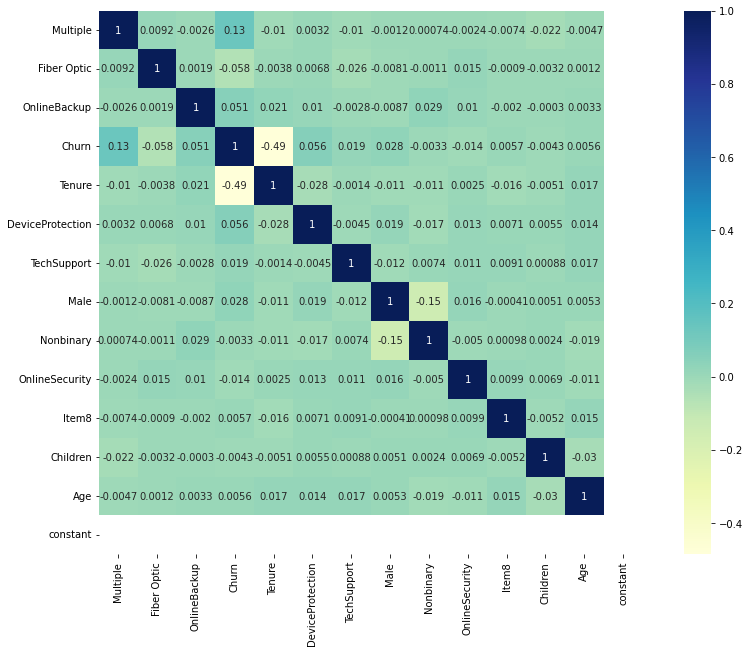

In [136]:

f, ax = plt.subplots(figsize=(15, 10))
df_chrun_corr= df[third_attemp_indep_var]
sns.heatmap(df_chrun_corr.corr(), annot=True,cmap="YlGnBu",square=True)
plt.show()

In [137]:
### I noticed that 
# Predictor               	   coed       std   	pvalue
# TechSupport             	 -0.0566     -0.014	    0.989
# Nonbinary               	-18.4953     13.548	    0.172
# Item8                   	  3.6365      1.957	    0.063


#### Final_reduced_model 

In [138]:
lm_gb_reduced_pvalues = pd.DataFrame(lm_gb_third.pvalues, columns=['pvalues'])


In [139]:
final_predictors=list(lm_gb_reduced_pvalues[lm_gb_reduced_pvalues['pvalues' ]<=0.05].index)

In [140]:
print(final_predictors)

['Multiple', 'Fiber Optic', 'OnlineBackup', 'Churn', 'Tenure', 'DeviceProtection', 'Male', 'OnlineSecurity', 'Children', 'Age', 'constant']


In [141]:
# sm.add_constant(df)
# final_predictors.append('constant')
lm_gb_reduced = sm.OLS(df['Bandwidth_GB_Year'], df[final_predictors]).fit()

print(lm_gb_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.170e+05
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:25:01   Log-Likelihood:                -67226.
No. Observations:               10000   AIC:                         1.345e+05
Df Residuals:                    9989   BIC:                         1.346e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Multiple            55.7535      4.082  

In [142]:
df.columns

Index(['Age', 'Children', 'Churn', 'Contacts', 'DeviceProtection', 'Email',
       'Fiber Optic', 'Income', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8', 'Male', 'Married', 'MonthlyCharge',
       'Multiple', 'Never Married', 'Nonbinary', 'One year', 'OnlineBackup',
       'OnlineSecurity', 'Outage_sec_perweek', 'PaperlessBilling', 'Phone',
       'Port_modem', 'Separated', 'StreamingMovies', 'StreamingTV', 'Tablet',
       'TechSupport', 'Techie', 'Tenure', 'Two Year', 'Widowed',
       'Yearly_equip_failure', 'Bandwidth_GB_Year', 'constant'],
      dtype='object')

#####  Create the Multi linear Regression Equation

In [143]:
print(final_predictors, 'Count', len(final_predictors))

['Multiple', 'Fiber Optic', 'OnlineBackup', 'Churn', 'Tenure', 'DeviceProtection', 'Male', 'OnlineSecurity', 'Children', 'Age', 'constant'] Count 11


In [144]:
#Generating the MLR Equation
MLR_equation = []
for var, coef in lm_gb_reduced.params.items():
    if var != 'constant':
        MLR_equation.append( '( ' + str(round(coef, 3)) + ' * ' + var  + ' )' )
    else:
        MLR_equation.append(str(round(coef, 3)))
' + '.join(MLR_equation)

'( 55.754 * Multiple ) + ( -245.693 * Fiber Optic ) + ( 81.124 * OnlineBackup ) + ( 215.808 * Churn ) + ( 83.758 * Tenure ) + ( 79.643 * DeviceProtection ) + ( 68.57 * Male ) + ( 85.099 * OnlineSecurity ) + ( 30.327 * Children ) + ( -3.311 * Age ) + 503.903'

In [145]:
# lm_gb_reduced.params, lm_gb_reduced.eigenvals

In [146]:
variable_exp =[]
for var, coef in lm_gb_reduced.params.items():
    if var != 'constant':
        if coef >0:
            variable_exp.append( 'For each unit of '  + var +  ' variable, the Bandwidth_GB_Year will increase by ' + str(round(coef, 3)) + ' units')
        else:
            variable_exp.append( 'For each unit of '  + var +  ' variable, the Bandwidth_GB_Year will deacrease by ' + str(round(coef, 3)) + ' units')

In [147]:
variable_exp

['For each unit of Multiple variable, the Bandwidth_GB_Year will increase by 55.754 units',
 'For each unit of Fiber Optic variable, the Bandwidth_GB_Year will deacrease by -245.693 units',
 'For each unit of OnlineBackup variable, the Bandwidth_GB_Year will increase by 81.124 units',
 'For each unit of Churn variable, the Bandwidth_GB_Year will increase by 215.808 units',
 'For each unit of Tenure variable, the Bandwidth_GB_Year will increase by 83.758 units',
 'For each unit of DeviceProtection variable, the Bandwidth_GB_Year will increase by 79.643 units',
 'For each unit of Male variable, the Bandwidth_GB_Year will increase by 68.57 units',
 'For each unit of OnlineSecurity variable, the Bandwidth_GB_Year will increase by 85.099 units',
 'For each unit of Children variable, the Bandwidth_GB_Year will increase by 30.327 units',
 'For each unit of Age variable, the Bandwidth_GB_Year will deacrease by -3.311 units']

Out of the 35 variables we started off with in the initial model we notice that 12 of them predict the model with R squaerd
and R Adj.Squared).

### Residual Analysis of the churn data


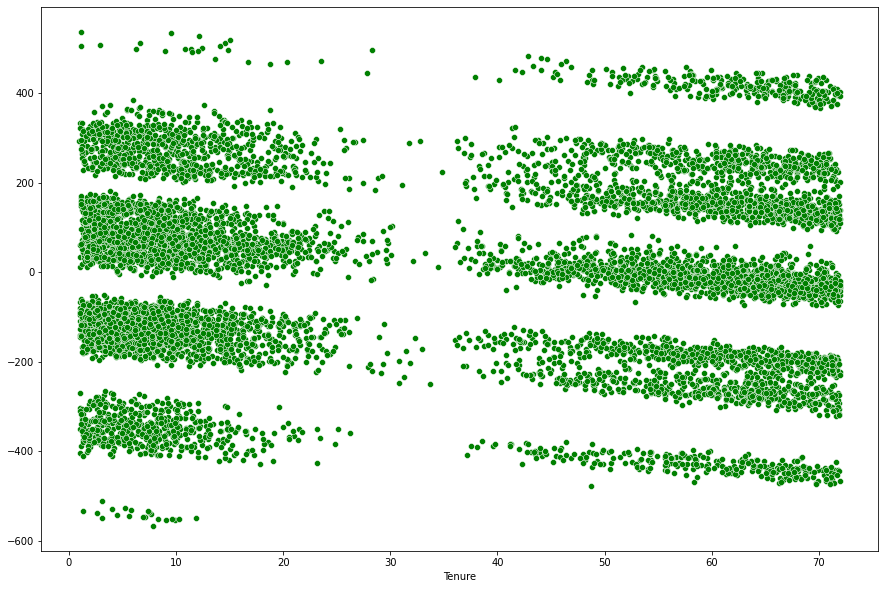

In [148]:
prepared_churn_clean = df
f, ax = plt.subplots(figsize=(15, 10))
residuals = prepared_churn_clean['Bandwidth_GB_Year'] - lm_gb_reduced.predict(prepared_churn_clean[final_predictors])
sns.scatterplot(x=prepared_churn_clean['Tenure'],y=residuals,color='green')
plt.show()